In [1]:
# imports
import matplotlib.pyplot as plt

import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans


In [2]:
# load data
fname = "../data/data.csv"
data = pd.read_csv(fname, skiprows=[0,1]) # because "<line>\n---- <application exited with code 0> ----\n", might need to changethis based on the stdout of your data
# TODO should probably suppress program output / pipe it to a different file so mem traces are consistently formatted
data.columns

Index(['timestamp', 'address', 'count', 'type'], dtype='object')

In [3]:
data_all_accesses = data[["timestamp", "address", "count"]]

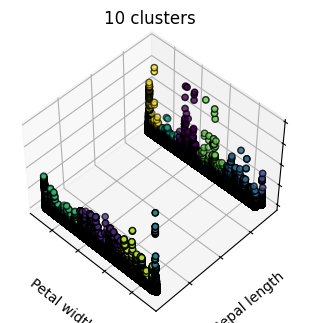

In [4]:
estimators = [
    ("k_means_10", KMeans(n_clusters=10, n_init="auto")),
    #("k_means_8", KMeans(n_clusters=8, n_init="auto")),
    #("k_means_3", KMeans(n_clusters=3, n_init="auto")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["10 clusters", "8 clusters", "3 clusters"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(data_all_accesses)
    labels = est.labels_

    ax.scatter(data_all_accesses["timestamp"], data_all_accesses["address"], data_all_accesses["count"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Address")
    ax.set_zlabel("Count")
    ax.set_title(title)

<Figure size 640x480 with 0 Axes>